<a href="https://colab.research.google.com/github/MungarllaSaiCharitha/MungarllaSaiCharithaYadav_Scifor/blob/main/Mini-Project_1/Mini-project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install necessary Dependencies and Setup**

In [1]:
pip install numpy==1.21.6

  Using cached numpy-1.21.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
Using cached numpy-1.21.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.0 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
albucore 0.0.12 requires numpy<2,>=1.24.4, but you have numpy 1.21.6 which is incompatible.
albumentations 1.4.12 requires numpy>=1.24.4, but you have numpy 1.21.6 which is incompatible.
albumentations 1.4.12 requires scipy>=1.10.0, but you have scipy 1.9.1 which is incompatible.
arviz 0.18.0 requires numpy<2.0,>=1.23.0, but you have numpy 1.21.

In [1]:
!pip install scipy==1.9.1
!pip install numba==0.55.1

In [2]:
!pip install tensorflow opencv-python matplotlib

  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.0 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
albumentations 1.4.12 requires scipy>=1.10.0, but you have scipy 1.9.1 which is incompatible.
cudf-cu12 24.4.1 requires numba>=0.57, but you have numba 0.55.1 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.4 which is incompatible.
rmm-cu12 24.4.0 requires numba>=0.57, but you have numba 0.55.1 which is inc

In [3]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.32.1
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.12
albumentations                   1.4.12
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.18.0
asn1crypto                       1.5.1
astropy                          6.1.2
astropy-iers-data                0.2024.7.29.0.32.7
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                 

In [49]:
import tensorflow as tf
import os

**2. Filter out images with unsupported format**

In [50]:
import cv2
import imghdr

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
data_dir = '/content/drive/My Drive/data'
os.chdir(data_dir)

#List the folders in the directory
os.listdir()

['sea', 'Mountains']

In [53]:
image_exts = ['jpeg','jpg','bmp','png']

In [54]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

Image not in ext list /content/drive/My Drive/data/sea/nature-landscape-view-beautiful-tropical-260nw-1940029552.jpg
Image not in ext list /content/drive/My Drive/data/sea/ocean-water-beach-The-Bahamas-Grand-Bahama.jpg
Image not in ext list /content/drive/My Drive/data/sea/focus-census-habitats-life-coral-reef-Red.jpg
Image not in ext list /content/drive/My Drive/data/sea/FKt230417-Dive510-20230422T205537Z-GinormousPlumopathes-4K.jpg
Image not in ext list /content/drive/My Drive/data/sea/front-view-morning-sky-bright-260nw-1727348677.jpg
Image not in ext list /content/drive/My Drive/data/sea/calm-weather-on-sea-ocean-600nw-2212935531.jpg
Image not in ext list /content/drive/My Drive/data/sea/depositphotos_649421438-stock-photo-waves-water-surface-background-sea.jpg
Image not in ext list /content/drive/My Drive/data/sea/depositphotos_649421432-stock-photo-beautiful-sunrise-sea.jpg
Image not in ext list /content/drive/My Drive/data/sea/Coastline-Banda-Islands-Sea-Pacific-Ocean.jpg
Image 

**Load Data**

In [55]:
import numpy as np
from matplotlib import pyplot as plt

In [56]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/My Drive/data')

Found 175 files belonging to 2 classes.


In [57]:
data_iterator = data.as_numpy_iterator()

In [58]:
batch = data_iterator.next()

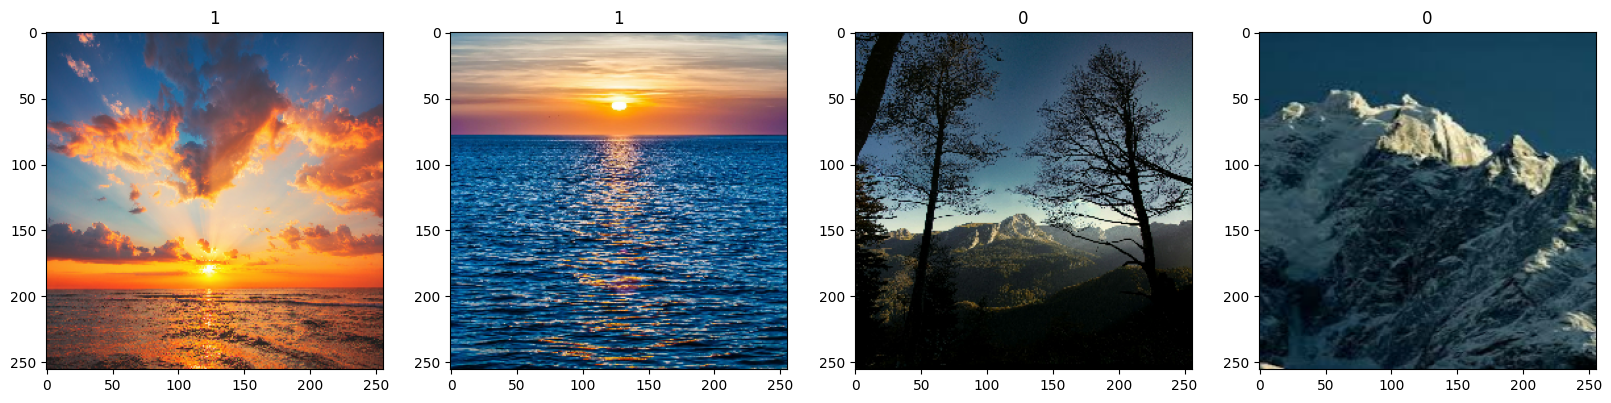

In [59]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

**4. Scale Data**

In [60]:
data = data.map(lambda x,y: (x/255, y))

In [61]:
data.as_numpy_iterator().next()

(array([[[[0.18431373, 0.4745098 , 0.99607843],
          [0.1842448 , 0.47444087, 0.99600947],
          [0.18039216, 0.47058824, 0.99215686],
          ...,
          [0.14071691, 0.44348192, 0.9841988 ],
          [0.15273437, 0.43928462, 0.9843137 ],
          [0.15294118, 0.4392157 , 0.9843137 ]],
 
         [[0.18431373, 0.4745098 , 0.99607843],
          [0.18428868, 0.47448477, 0.9960534 ],
          [0.18281594, 0.47301203, 0.9945807 ],
          ...,
          [0.14321385, 0.44348192, 0.9814824 ],
          [0.15277827, 0.43928462, 0.9842698 ],
          [0.15294118, 0.4392157 , 0.9843137 ]],
 
         [[0.1858609 , 0.476057  , 0.9976256 ],
          [0.18583371, 0.47602978, 0.99759847],
          [0.18424417, 0.47444025, 0.9960089 ],
          ...,
          [0.14937069, 0.44498378, 0.9782495 ],
          [0.15440488, 0.4408318 , 0.98421764],
          [0.15448835, 0.44076288, 0.9843137 ]],
 
         ...,
 
         [[0.81637967, 0.6391891 , 0.20562881],
          [0.67236

**5. Split Data**

In [62]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [63]:
train_size

4

In [64]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

**6. Build Deep Learning Model**

In [65]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [67]:
model = Sequential()

In [68]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [69]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

**7. Train**

In [71]:
logdir='logs'

In [72]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [73]:
print(val)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [74]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 7s/step - accuracy: 0.5385 - loss: 0.9047 - val_accuracy: 0.5000 - val_loss: 0.7631
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 7s/step - accuracy: 0.5396 - loss: 0.7076 - val_accuracy: 0.8438 - val_loss: 0.6565
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 6s/step - accuracy: 0.8323 - loss: 0.6230 - val_accuracy: 0.6562 - val_loss: 0.5612
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 6s/step - accuracy: 0.6781 - loss: 0.5700 - val_accuracy: 0.6562 - val_loss: 0.6587
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.7698 - loss: 0.4754 - val_accuracy: 0.5938 - val_loss: 0.6254
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.7250 - loss: 0.5152 - val_accuracy: 0.7812 - val_loss: 0.4536
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 7s/step - accuracy: 0.7729 - loss: 0.4312 - val_accuracy: 0.8750 - val_loss: 0.4261
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.8875 - loss: 0.3807 - val_accuracy: 0.8438 - val_loss: 0.3045
Epoch 9/

**8. Plot Performance**

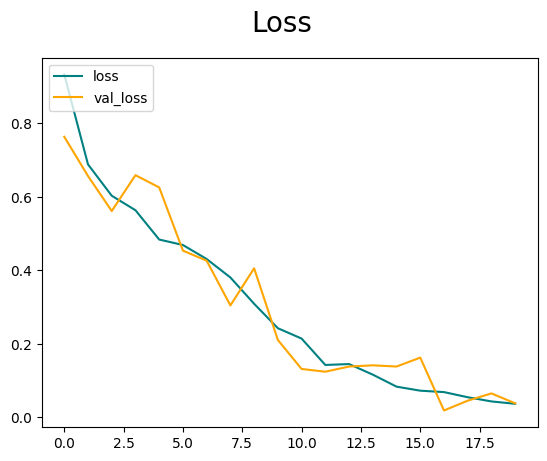

In [75]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

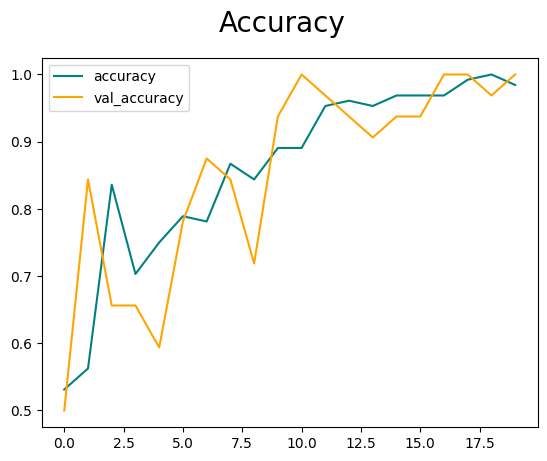

In [76]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


**9. Evaluate**

In [77]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [78]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [79]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [80]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)



**10. Test**

In [81]:
import cv2

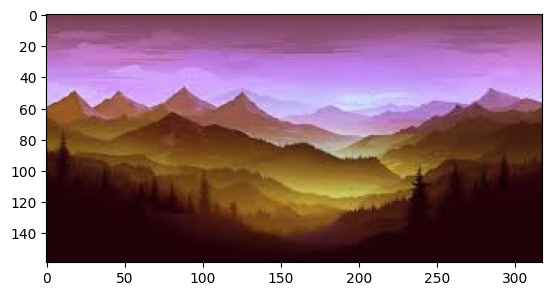

In [83]:
img_path = '/content/drive/MyDrive/data/mountain_image.jpeg'
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

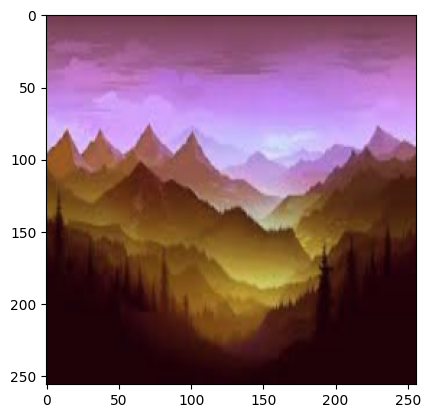

In [84]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [85]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


In [86]:
yhat

array([[0.01001666]], dtype=float32)

In [87]:
if yhat > 0.5:
    print(f'Predicted class is Sea')
else:
    print(f'Predicted class is Mountain')

Predicted class is Mountain


**11. Save the Model**

In [88]:
from tensorflow.keras.models import load_model

In [97]:
import os
from tensorflow.keras.models import save_model

# Define the directory and file path
directory = '/content/drive/MyDrive/models'
file_path = os.path.join(directory, 'imageclassifier.h5')

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the model
model.save(file_path)


In [98]:
from tensorflow.keras.models import load_model

# Define the path to the model file
file_path = os.path.join('models', 'imageclassifier.h5')

# Load the model
if os.path.exists(file_path):
    new_model = load_model(file_path)
else:
    print(f"File {file_path} does not exist.")


In [99]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


array([[0.01001666]], dtype=float32)